## Install Requirements and Clone the Ultralytics yolov5 Respository

In [1]:
# Installing the correct (to this date June 2022) pytorch dependency so that the yolov5 model can run on the gpu
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [2]:
# Cloning the ultralytics yolov5 repository to the parent directory
!cd .. & git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
# Installs all the necessary libraries to train the yolov5 network
!cd ../yolov5 & pip install -r requirements.txt

  Using cached matplotlib-3.5.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached PyYAML-6.0-cp39-cp39-win_amd64.whl (151 kB)
  Using cached scipy-1.8.1-cp39-cp39-win_amd64.whl (36.9 MB)
  Using cached protobuf-3.20.1-cp39-cp39-win_amd64.whl (904 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached pandas-1.4.2-cp39-cp39-win_amd64.whl (10.5 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached psutil-5.9.1-cp39-cp39-win_amd64.whl (245 kB)
  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)
  Using cached kiwisolver-1.4.2-cp39-cp39-win_amd64.whl (55 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
 

## Train Model

In [1]:
# Imports
import torch
from matplotlib import pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
# Train the yolov5s network, see https://github.com/ultralytics/yolov5 for further information.
# Make sure that you put the "yolo_dataset.yaml" into the cloned yolov5 git repository
!cd ../yolov5 && python train.py --img 320 --batch 16 --epochs 1 --data yolo_dataset.yaml --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=yolo_dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.1-246-g2dd3db0 Python-3.9.0 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv

## Load Model

In [7]:
# Load trained model. 
# For your own trained weights load the weights from the newes yolov5/runs/train/exp folder.
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/nicgr/Documents/GitHub/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\nicgr/.cache\torch\hub\master.zip
YOLOv5  2022-6-8 Python-3.9.0 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 367 layers, 46183668 parameters, 0 gradients
Adding AutoShape... 


In [8]:
# Feed an image to the model and print the detection results
img = os.path.join('data', 'Blender/images', 'car_000002_left.png')
results = model(img)
results.print()

image 1/1: 1080x1920 1 car
Speed: 62.2ms pre-process, 210.2ms inference, 6.0ms NMS per image at shape (1, 3, 384, 640)


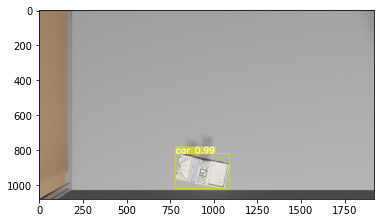

In [9]:
# Visualize the resuslts
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()